In [1]:
from keras.applications.vgg19 import VGG19
from inception_v4 import inception_v4
from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet201
from keras.models import Model, model_from_json
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, AveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import numpy as np
import cv2
import math
import os
import scipy.io as scio
import matplotlib.pyplot as plt
%matplotlib inline
from utils import get_data, generate_generator, gen_img_paths_and_labels, SaveModelOnMSE_1, SaveModelOnMSE_2


os.environ["CUDA_VISIBLE_DEVICES"] = "0"
net = 'inceptionV4'
LOSS = 'MSE'
idx_start, idx_end = 1, 3
initial_model_dir = 'weights_new/imagenet_weights'
initial_json_path = os.path.join(initial_model_dir, net+'.json')
initial_hdf5_path = os.path.join(initial_model_dir, net+'.hdf5')

/home/chengxg/anaconda2/envs/zp_py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


len(train_paths), len(train_labels): 55200 55200
len(validate_paths), len(validate_labels): 100 100
len(test_paths), len(test_labels): 12000 12000
len(test_paths_real), len(test_labels_real): 199 199
Training...
epochs per iteration = 20
Epoch 1/60
173/173 [==============================] - 108s 625ms/step - loss: 19888.1834 - val_loss: 12237.8779
Epoch 2/60
173/173 [==============================] - 81s 466ms/step - loss: 16944.3251 - val_loss: 9496.5371
Epoch 3/60
173/173 [==============================] - 83s 481ms/step - loss: 15139.9691 - val_loss: 7147.3330
Epoch 4/60
173/173 [==============================] - 83s 480ms/step - loss: 12590.9474 - val_loss: 5405.2461
Epoch 5/60
173/173 [==============================] - 83s 478ms/step - loss: 10447.6670 - val_loss: 784.3655
Epoch 6/60
173/173 [==============================] - 83s 478ms/step - loss: 9379.4239 - val_loss: 4373.3916
Epoch 7/60
173/173 [==============================] - 83s 479ms/step - loss: 7641.1186 - val_loss: 493

173/173 [==============================] - 83s 481ms/step - loss: 52.1801 - val_loss: 7862.0342
Epoch 15/60
173/173 [==============================] - 83s 478ms/step - loss: 53.9705 - val_loss: 7098.3828
Epoch 16/60
173/173 [==============================] - 82s 473ms/step - loss: 45.5736 - val_loss: 6719.6328
Epoch 17/60
173/173 [==============================] - 81s 469ms/step - loss: 45.7148 - val_loss: 7409.8311
Epoch 18/60
173/173 [==============================] - 81s 469ms/step - loss: 46.9712 - val_loss: 6917.4023
Epoch 19/60
173/173 [==============================] - 81s 470ms/step - loss: 44.6934 - val_loss: 6134.0903
Epoch 20/60
173/173 [==============================] - 81s 469ms/step - loss: 44.4796 - val_loss: 6155.1040
Epoch 21/60
173/173 [==============================] - 81s 466ms/step - loss: 50.6860 - val_loss: 6609.7852
Epoch 22/60
173/173 [==============================] - 81s 467ms/step - loss: 52.4234 - val_loss: 6806.4399
Epoch 23/60
173/173 [===================

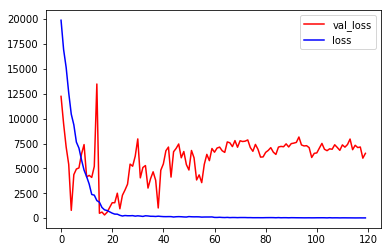

len(train_paths), len(train_labels): 53400 53400
len(validate_paths), len(validate_labels): 115 115
len(test_paths), len(test_labels): 13800 13800
len(test_paths_real), len(test_labels_real): 228 228
Training...
epochs per iteration = 20
Epoch 1/60
167/167 [==============================] - 104s 623ms/step - loss: 18610.9291 - val_loss: 28525.3594
Epoch 2/60
167/167 [==============================] - 78s 469ms/step - loss: 16215.5672 - val_loss: 28525.3594
Epoch 3/60
167/167 [==============================] - 78s 465ms/step - loss: 13477.0871 - val_loss: 28525.3633
Epoch 4/60
167/167 [==============================] - 77s 462ms/step - loss: 12314.5916 - val_loss: 28525.3691
Epoch 5/60
167/167 [==============================] - 77s 462ms/step - loss: 11214.2380 - val_loss: 28525.3750
Epoch 6/60
167/167 [==============================] - 77s 459ms/step - loss: 9732.0768 - val_loss: 28345.1758
Epoch 7/60
167/167 [==============================] - 77s 459ms/step - loss: 8093.8468 - val_los

Epoch 14/60
167/167 [==============================] - 77s 460ms/step - loss: 64.2376 - val_loss: 4055.4736
Epoch 15/60
167/167 [==============================] - 77s 458ms/step - loss: 64.4438 - val_loss: 3883.0425
Epoch 16/60
167/167 [==============================] - 77s 459ms/step - loss: 54.2029 - val_loss: 3888.3489
Epoch 17/60
167/167 [==============================] - 77s 459ms/step - loss: 56.3510 - val_loss: 3929.7549
Epoch 18/60
167/167 [==============================] - 77s 459ms/step - loss: 55.9988 - val_loss: 3833.0754
Epoch 19/60
167/167 [==============================] - 77s 458ms/step - loss: 60.2943 - val_loss: 3861.3411
Epoch 20/60
167/167 [==============================] - 77s 458ms/step - loss: 55.4771 - val_loss: 3752.5793
Epoch 21/60
167/167 [==============================] - 77s 458ms/step - loss: 70.6467 - val_loss: 3582.3572
Epoch 22/60
167/167 [==============================] - 77s 459ms/step - loss: 57.2831 - val_loss: 3477.2900
Epoch 23/60
167/167 [=======

In [ ]:
# Initial models
if not os.path.exists(initial_hdf5_path):
    if not os.path.exists(initial_model_dir):
        os.makedirs(initial_model_dir)
    if net == 'vgg19':
        base_model = VGG19(weights='imagenet', include_top=False)
    elif net == 'inceptionV4':
        base_model = inception_v4(weights='imagenet', include_top=False, input_shape=((890 - 95)//6, 1920//6, 3))
    elif net == 'densenet201':
        base_model = DenseNet201(weights='imagenet', include_top=False)
    elif net == 'resnet50':
        base_model = ResNet50(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1, activation='relu')(x)
    model = Model(inputs=base_model.input, outputs=x, name=net)
    with open(initial_json_path, 'w') as fout:
        fout.write(model.to_json())
    model.save_weights(initial_hdf5_path)
# Data import
with open(initial_json_path, 'r') as fout:
    model = model_from_json(fout.read())
for idx_validate in range(idx_start, idx_end+1):

    (train_paths, train_labels, validate_paths, validate_labels, test_paths, test_labels,
     test_paths_real, test_labels_real, test_paths_for_test, test_labels_for_test) = get_data(idx_validate)
    print('len(train_paths), len(train_labels):', len(train_paths), len(train_labels))
    print('len(validate_paths), len(validate_labels):', len(validate_paths), len(validate_labels))
    print('len(test_paths), len(test_labels):', len(test_paths), len(test_labels))
    print('len(test_paths_real), len(test_labels_real):', len(test_paths_real), len(test_labels_real))

    # Train
    model.load_weights(initial_hdf5_path)
    optimizer_1 = Adam(lr=1e-4)
    optimizer_2 = Adam(lr=1e-5)

    model.compile(optimizer=optimizer_1, loss=LOSS.lower())

    saver_1 = SaveModelOnMSE_1(idx_validate)
    saver_2 = SaveModelOnMSE_2(idx_validate)
    if not os.path.exists(os.path.join('weights_new', LOSS, net, 'Test_set_{}'.format(idx_validate))):
        os.makedirs(os.path.join('weights_new', LOSS, net, 'Test_set_{}'.format(idx_validate)))
    print('Training...')
    batch_size_train = 16
    # validation_interval = 3000
    # epochs_per_iteration = math.ceil(len(train_labels) / validation_interval)
    epochs_per_iteration = 20
    validation_interval = math.ceil(len(train_labels) / epochs_per_iteration)
    batch_size_validate = math.floor(len(validate_labels)/1)
    print('epochs per iteration =', epochs_per_iteration)
    train_generator = generate_generator(train_paths, train_labels, batch_size=batch_size_train, reverse=True)
    validate_generator = generate_generator(validate_paths, validate_labels, batch_size=batch_size_validate)
    history_1 = model.fit_generator(
        train_generator, steps_per_epoch=math.ceil(validation_interval/batch_size_train),
        epochs=epochs_per_iteration*3,
        validation_data=validate_generator, validation_steps=1,
        verbose=1, callbacks=[saver_1],
        use_multiprocessing=True
    )
    model.compile(optimizer=optimizer_2, loss=LOSS.lower())
    history_2 = model.fit_generator(
        train_generator, steps_per_epoch=math.ceil(validation_interval/batch_size_train),
        epochs=epochs_per_iteration*3,
        validation_data=validate_generator, validation_steps=1,
        verbose=1, callbacks=[saver_2],
        use_multiprocessing=True
    )
    vl, l = history_1.history['val_loss']+history_2.history['val_loss'], history_1.history['loss']+history_2.history['loss']
    if not os.path.exists(os.path.join('loss_new', LOSS, net, 'Test_set_{}'.format(idx_validate))):
        os.makedirs(os.path.join('loss_new', LOSS, net, 'Test_set_{}'.format(idx_validate)))
    np.savetxt(os.path.join('loss_new', LOSS, net, 'Test_set_{}'.format(idx_validate), '{}_val.txt'.format(LOSS)), vl)
    np.savetxt(os.path.join('loss_new', LOSS, net, 'Test_set_{}'.format(idx_validate), '{}_train.txt'.format(LOSS)), l)
    plt.plot(vl, 'r')
    plt.plot(l, 'b')
    plt.legend(['val_loss', 'loss'])
    plt.show()


In [ ]:
for idx_validate in range(idx_start, idx_end+1):
    # Predict and Save
    (train_paths, train_labels, validate_paths, validate_labels, test_paths, test_labels,
     test_paths_real, test_labels_real, test_paths_for_test, test_labels_for_test) = get_data(idx_validate)
    src_files = 'weights_new/{}/{}/*.hdf5'.format(LOSS, net)
    dst_dir = 'weights_new/{}/{}/Test_set_{}'.format(LOSS, net, idx_validate)
    # os.system("mv {} {}".format(src_files, dst_dir))
    # with open(initial_json_path, 'r') as fout:
    #     model = model_from_json(fout.read())
    models = os.listdir(dst_dir)
    models = sorted(models, key=lambda x: int(x.split('epoch')[1].split('_')[0]))
    losses = []
    epochs = []
    for i in models:
        losses.append(float(i.split('_')[-1][len(LOSS):-5]))
        epochs.append(int(i.split('epoch')[-1].split('_')[0]))

    print('{}-th, len(losses): {}'.format(idx_validate, len(losses)))
    for idx, loss in enumerate(losses):
        if idx < 0:
            continue
        if idx > 200:
            break
        print(idx, 'loading', net+'_{}'.format(LOSS)+str(loss)+'.hdf5', end=', ')
        weights_file_path = os.path.join('weights_new', LOSS, net, 'Test_set_{}'.format(idx_validate), net+'_{}_epoch'.format(LOSS)+str(epochs[idx])+'_{}'.format(LOSS)+str(loss)+'.hdf5')
        model.load_weights(weights_file_path)
        test_epoch = len(test_labels_for_test) // 50
        batch_size_for_test = len(test_labels_for_test) // test_epoch
        test_generator = generate_generator(test_paths_for_test, test_labels_for_test, batch_size=batch_size_for_test)
        preds = []
        y_vals = []
        print('Generating ', end='')
        for i in range(test_epoch)[:]:
            if i % 10 == 0:
                print('{}/{}'.format(i+1, test_epoch), end=', ')
            x_val, y_val = test_generator.__next__()
            preds += np.squeeze(model.predict(x_val)).tolist()
            y_vals += y_val.tolist()
        preds = np.asarray(preds)
        y_vals = np.asarray(y_vals).astype(np.float)
        MSE, MAE, MAPE = round(np.mean(np.square(preds-y_vals)), 3), round(np.mean(np.abs(preds-y_vals)), 3), round(100 * np.mean(np.abs(preds - y_vals) / y_vals), 3)
        print('MAE={}, MSE={}, MAPE={}.'.format(MAE, MSE, MAPE))
        path_SI = os.path.join('preds_new', LOSS, net, 'Test_set_{}'.format(idx_validate), 'Subject_Interpolation')
        if not os.path.exists(path_SI):
            os.makedirs(path_SI)
        prediction_save_path = os.path.join(path_SI, net+'_{}_epoch'.format(LOSS)+str(epochs[idx])+'_MAPE{}_MAE{}_MSE{}.txt'.format(str(MAPE)[:str(MAE).find('.')+2], str(MAE)[:str(MAE).find('.')+2], str(MSE)[:str(MSE).find('.')+2]))
        np.savetxt(prediction_save_path,  preds)
        if idx % 100 == 60:
            plt.plot(preds); plt.plot(y_vals); plt.legend(['pd', 'lbl']); plt.show()


In [ ]:
# Test real data
# with open(initial_json_path, 'r') as fout:
#     model = model_from_json(fout.read())
for camera in range(idx_start, idx_end+1):
    vis = scio.loadmat('./data/Subject_Measured_Vis.mat')
    vis_keys_median = [i for i in vis.keys() if 'dian' in i][camera-1]
    label_for_test = []
    label_for_test = np.squeeze(vis[vis_keys_median]).tolist()

    path_for_test = []
    camera_dir = './data/point_NUPT/'
    camera_path = os.path.join(camera_dir, sorted(os.listdir(camera_dir), key=lambda x: int(x.split('_')[0]))[camera-1])
    for img_path in sorted(os.listdir(camera_path), key=lambda x: int(x.split('_')[-1].rstrip('.jpg'))):
        path_for_test.append(os.path.join(camera_path, img_path))
    label_for_test, path_for_test = np.squeeze(np.array(label_for_test)), np.squeeze(np.array(path_for_test))
    print(label_for_test.shape, path_for_test.shape)

    dst_dir = 'weights_new/{}/{}/Test_set_{}'.format(LOSS, net, camera)
    models = os.listdir(dst_dir)
    models = sorted(models, key=lambda x: int(x.split('epoch')[1].split('_')[0]))
    losses = []
    epochs = []
    for i in models:
        losses.append(float(i.split('_')[-1][len(LOSS):-5]))
        epochs.append(int(i.split('epoch')[-1].split('_')[0]))

    print('len(losses):', len(losses))
    prediction_save_dir = os.path.join('preds_new', LOSS, net, 'Test_set_{}'.format(camera), 'Subject')
    if not os.path.exists(prediction_save_dir):
        os.makedirs(prediction_save_dir)
    for idx, loss in enumerate(losses):
        if idx < 0:
            continue
        if idx > 200:
            break
        weights_file_path = os.path.join('weights_new', LOSS, net, 'Test_set_{}'.format(camera), net+'_{}_epoch'.format(LOSS)+str(epochs[idx])+'_{}'.format(LOSS)+str(loss)+'.hdf5')
        print(idx, 'loading {}'.format(weights_file_path), end=', ')
        test_generator = generate_generator(path_for_test, label_for_test, batch_size=label_for_test.shape[0])
        model.load_weights(weights_file_path)
        img_for_test = test_generator.__next__()[0]
        preds = np.squeeze(model.predict(img_for_test))
        MSE, MAE, MAPE = round(np.mean(np.square(preds-label_for_test)), 3), round(np.mean(np.abs(preds-label_for_test)), 3), round(100 * np.mean(np.abs(preds - label_for_test) / label_for_test), 3)
        print('MAPE={}, MAE={}, MSE={}'.format(MAPE, MAE, MSE))
        prediction_save_path = net+'_{}_epoch'.format(LOSS)+str(epochs[idx])+'_MAPE{}_MAE{}_MSE{}.txt'.format(str(MAPE)[:str(MAE).find('.')+2], str(MAE)[:str(MAE).find('.')+2], str(MSE)[:str(MSE).find('.')+2])
        np.savetxt(os.path.join(prediction_save_dir, prediction_save_path), preds)
        if idx % 50 == 0:
            plt.plot(preds); plt.plot(label_for_test); plt.legend(['pd', 'lbl']); plt.show()